# Solving systems of linear equations (including under- and over-determined)

In this recipe, you will learn how to solve systems of linear equations using OpenCV. This functionality is a key building block of many computer vision and machine learning algorithms.

1. **A.** Systems of linear equations can be solved using OpenCV's `cv2.solve` function. It accepts a coefficients matrix, the right-hand side of the system, and optional flags, then returns a solution (the success indicator and solution vector, to be exact). As you can see in the first example, it can be used to solve systems with unique solutions.

2. **B.** You can specify the `cv2.DECOMP_NORMAL` flag, in which case an internally normalized system of linear equations will be constructed. This can be used to solve over-determined systems with one or no solutions, in the latter case, the least squares problem's solution is returned.

3. **C.** An under-determined system of linear equations has either no or multiple solutions. In the preceding code, we constructed a system that has multiple solutions. The solution with minimal norm can be found using the MoorePenrose inverse (`A_pinv` in the code). As there are multiple solutions, the one we find might have more errors, relative to the solution we used to generate the right-hand side of the system.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ax = plt.gca()
    x_major_ticks=np.arange(x_min, x_max, x_major_size)
    x_minor_ticks=np.arange(x_min, x_max, x_minor_size)
    y_major_ticks=np.arange(y_min, y_max, y_major_size)
    y_minor_ticks=np.arange(y_min, y_max, y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)

#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S06\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s06\env

d:\html_doc\program\opencv\packt\s06\env\lib\site-packages
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s06\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S06\env


matrix_rank(A) == 10
------  A------------------------    Shape(10, 10) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 ]
[ -0.46341769281246226 -0.46572975357025687 0.24196227156603412 -1.913280244657798 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 ]
[ -0.6017066122293969 1.8522781845089378 -0.013497224737933921 -1.0577109289559004 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 ]


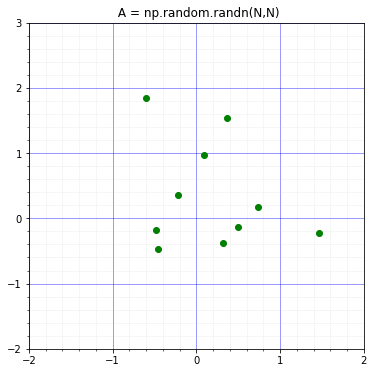

In [2]:
np.random.seed(42)

N = 10
A = np.random.randn(N,N)

print("matrix_rank(A) ==",np.linalg.matrix_rank(A))



#######################################
print_image('A','A',A,0,5,0,4)

plt.figure(figsize=(6,6))
plt_view_grid(plt, 'on',-2,2,-2,3,1,0.2,1,0.2,major_color='b')
plt.title(' A = np.random.randn(N,N)')
plt.plot(A[:,0],A[:,1],'o', color="green")
plt.show()

 ## A. Generate a system of linear equations:

------  A------------------------    Shape(10, 10) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 ]
[ -0.46341769281246226 -0.46572975357025687 0.24196227156603412 -1.913280244657798 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 ]
[ -0.6017066122293969 1.8522781845089378 -0.013497224737933921 -1.0577109289559004 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 ]


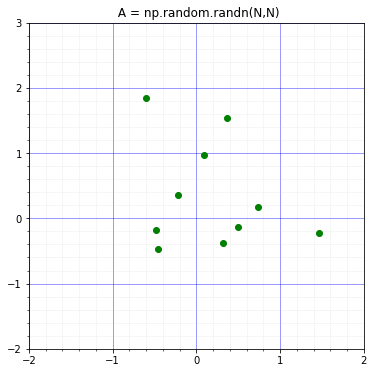

In [3]:
np.random.seed(42)
while np.linalg.matrix_rank(A) < N:
    A = np.random.randn(N,N)
    

    
#######################################
print_image('A','A',A,0,5,0,4)

plt.figure(figsize=(6,6))
plt_view_grid(plt, 'on',-2,2,-2,3,1,0.2,1,0.2,major_color='b')
plt.title(' A = np.random.randn(N,N)')
plt.plot(A[:,0],A[:,1],'o', color="green")
plt.show()

In [4]:
np.random.seed(42)
x = np.random.randn(N,1)


#######################################
print_image('X','X',x,0,10,0,N+1)

------  X------------------------    Shape(10, 1) X: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]
[ -0.23413695694918055 ]
[ 1.5792128155073915 ]
[ 0.7674347291529088 ]
[ -0.4694743859349521 ]
[ 0.5425600435859647 ]


In [5]:
b = A @ x


###########################################
print_image('b','b',b,0,10,0,N+1)

------  b------------------------    Shape(10, 1) b: float64
[ 6.7122570502988195 ]
[ -4.085788532659923 ]
[ -2.6710905121025057 ]
[ -2.5251249853306694 ]
[ -0.7096877230530863 ]
[ -0.9409035272879298 ]
[ -3.1219314405728165 ]
[ 1.5341764638969206 ]
[ 2.541272355869411 ]
[ -0.06668224406075446 ]


### A. Solve the system of linear equations:

**A.** Systems of linear equations can be solved using OpenCV's `cv2.solve` function. It accepts a coefficients matrix, the right-hand side of the system, and optional flags, then returns a solution (the success indicator and solution vector, to be exact). As you can see in the first example, it can be used to solve systems with unique solutions.

In [6]:
ok, x_est = cv2.solve(A, b)
print('Solved:', ok)
if ok: #True
    print('Residual:', cv2.norm(b - A @ x_est))
    print('Relative error:', cv2.norm(x_est - x) / cv2.norm(x))

    

    
#############################################
print_image('x','x',x,0,10,0,N+1)
print_image('x_est','x_est',x_est,0,10,0,N+1)

Solved: True
Residual: 1.9295615482511576e-15
Relative error: 1.2067842884489285e-15
------  x------------------------    Shape(10, 1) x: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]
[ -0.23413695694918055 ]
[ 1.5792128155073915 ]
[ 0.7674347291529088 ]
[ -0.4694743859349521 ]
[ 0.5425600435859647 ]
------  x_est--------------------    Shape(10, 1) x_est: float64
[ 0.4967141530112337 ]
[ -0.13826430117118552 ]
[ 0.6476885381006915 ]
[ 1.5230298564080247 ]
[ -0.2341533747233372 ]
[ -0.23413695694918044 ]
[ 1.5792128155073928 ]
[ 0.7674347291529074 ]
[ -0.469474385934951 ]
[ 0.5425600435859652 ]


## B. Construct an over-determined system of linear equations:

matrix_rank(A) == 10
------  A------------------------    Shape(20, 10) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 ]
[ -0.46341769281246226 -0.46572975357025687 0.24196227156603412 -1.913280244657798 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 ]
[ -0.6017066122293969 1.8522781845089378 -0.013497224737933921 -1.0577109289559004 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 ]


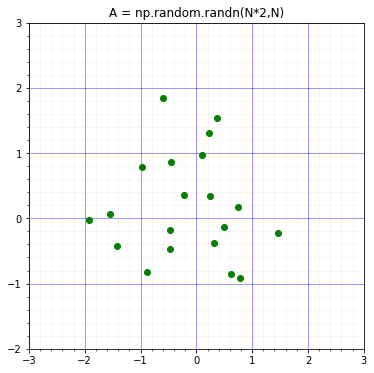

In [7]:
np.random.seed(42)

N = 10
A = np.random.randn(N*2,N)

print("matrix_rank(A) ==",np.linalg.matrix_rank(A))



#######################################
print_image('A','A',A,0,5,0,4)

plt.figure(figsize=(6,6))
plt_view_grid(plt, 'on',-3,3,-2,3,1,0.2,1,0.2,major_color='b')
plt.title('A = np.random.randn(N*2,N)')
plt.plot(A[:,0],A[:,1],'o', color="green")
plt.show()

matrix_rank(A) == 10
------  A------------------------    Shape(20, 10) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 -0.23415337472333597 ]
[ -0.46341769281246226 -0.46572975357025687 0.24196227156603412 -1.913280244657798 -1.7249178325130328 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 -0.5443827245251827 ]
[ -0.6017066122293969 1.8522781845089378 -0.013497224737933921 -1.0577109289559004 0.822544912103189 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 -1.4785219903674274 ]


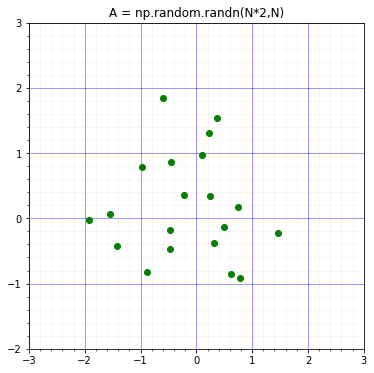

In [8]:
np.random.seed(42)

while np.linalg.matrix_rank(A) < N:
    A = np.random.randn(N*2,N)
    
print("matrix_rank(A) ==",np.linalg.matrix_rank(A))




#######################################
print_image('A','A',A,0,5,0,5)

plt.figure(figsize=(6,6))
plt_view_grid(plt, 'on',-3,3,-2,3,1,0.2,1,0.2,major_color='b')
plt.title('A = np.random.randn(N*2,N)')
plt.plot(A[:,0],A[:,1],'o', color="green")
plt.show()

In [9]:
np.random.seed(42)
x = np.random.randn(N,1)


#######################################
print_image('X','X',x,0,10,0,N+1)

------  X------------------------    Shape(10, 1) X: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]
[ -0.23413695694918055 ]
[ 1.5792128155073915 ]
[ 0.7674347291529088 ]
[ -0.4694743859349521 ]
[ 0.5425600435859647 ]


In [10]:
b = A @ x


###########################################
print_image('b','b',b,0,10,0,N+1)

------  b------------------------    Shape(20, 1) b: float64
[ 6.7122570502988195 ]
[ -4.085788532659923 ]
[ -2.6710905121025057 ]
[ -2.5251249853306694 ]
[ -0.7096877230530863 ]
[ -0.9409035272879298 ]
[ -3.1219314405728165 ]
[ 1.5341764638969206 ]
[ 2.5412723558694106 ]
[ -0.06668224406075454 ]


### B. Solve the over-determined system of linear equations:

**B.** You can specify the `cv2.DECOMP_NORMAL` flag, in which case an internally normalized system of linear equations will be constructed. This can be used to solve over-determined systems with one or no solutions, in the latter case, the least squares problem's solution is returned.

In [11]:
ok, x_est = cv2.solve(A, b, flags=cv2.DECOMP_NORMAL)
print('Solved overdetermined system:', ok)
if ok:
    print('Residual:', cv2.norm(b - A @ x_est))
    print('Relative error:', cv2.norm(x_est - x) / cv2.norm(x))
    
    
    
#############################################
print_image('x','x',x,0,10,0,N+1)
print_image('x_est','x_est',x_est,0,10,0,N+1)    

Solved overdetermined system: True
Residual: 3.663841114510703e-15
Relative error: 7.808827992072877e-16
------  x------------------------    Shape(10, 1) x: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]
[ -0.23413695694918055 ]
[ 1.5792128155073915 ]
[ 0.7674347291529088 ]
[ -0.4694743859349521 ]
[ 0.5425600435859647 ]
------  x_est--------------------    Shape(10, 1) x_est: float64
[ 0.4967141530112324 ]
[ -0.13826430117118466 ]
[ 0.647688538100693 ]
[ 1.5230298564080262 ]
[ -0.23415337472333542 ]
[ -0.23413695694918046 ]
[ 1.5792128155073908 ]
[ 0.7674347291529092 ]
[ -0.4694743859349533 ]
[ 0.5425600435859639 ]


## C. Construct an under-determined system of linear equations that have more than one solution:

matrix_rank(A) == 10
------  A------------------------    Shape(10, 20) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 ]
[ -0.47917423784528995 -0.18565897666381712 -1.1063349740060282 -1.1962066240806708 ]
[ -0.21967188783751193 0.3571125715117464 1.477894044741516 -0.5182702182736474 ]


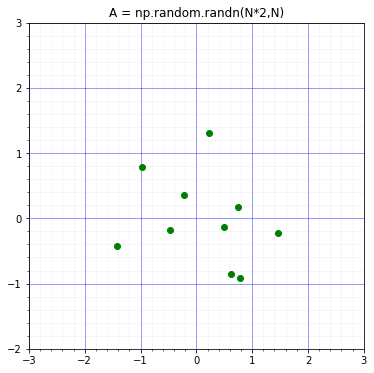

In [12]:
np.random.seed(42)
N = 10
A = np.random.randn(N,N*2)

print("matrix_rank(A) ==",np.linalg.matrix_rank(A))




#######################################
print_image('A','A',A,0,5,0,4)

plt.figure(figsize=(6,6))
plt_view_grid(plt, 'on',-3,3,-2,3,1,0.2,1,0.2,major_color='b')
plt.title('A = np.random.randn(N*2,N)')
plt.plot(A[:,0],A[:,1],'o', color="green")
plt.show()

In [13]:
np.random.seed(42)
x = np.random.randn(N*2,1)


#######################################
print_image('X','X',x,0,10,0,N+1)

------  X------------------------    Shape(20, 1) X: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]
[ -0.23413695694918055 ]
[ 1.5792128155073915 ]
[ 0.7674347291529088 ]
[ -0.4694743859349521 ]
[ 0.5425600435859647 ]


In [14]:
b = A @ x


###########################################
print_image('b','b',b,0,10,0,N+1)

------  b------------------------    Shape(10, 1) b: float64
[ 18.098300772484276 ]
[ -1.8662033071712878 ]
[ -5.242408801147167 ]
[ -0.4096850790224016 ]
[ 4.1102490356259835 ]
[ -5.260488141955751 ]
[ -1.7472291562225337 ]
[ -6.69880954423789 ]
[ -2.933959094115421 ]
[ 4.855574540543193 ]


### C. Solve the under-determined system of linear equations. Find the solution with minimal norm:

**C.** An under-determined system of linear equations has either no or multiple solutions. In the preceding code, we constructed a system that has multiple solutions. The solution with minimal norm can be found using the MoorePenrose inverse (`A_pinv` in the code). As there are multiple solutions, the one we find might have more errors, relative to the solution we used to generate the right-hand side of the system.

In [15]:
w, u, v_t = cv2.SVDecomp(A, flags=cv2.SVD_FULL_UV)



###########################################
print_image('W','W',w,0,10,0,N+1)
print_image('U','U',u,0,10,0,4)
print_image('v_t','v_t',v_t,0,10,0,4)

------  W------------------------    Shape(10, 1) W: float64
[ 6.131054849255195 ]
[ 5.872987669336215 ]
[ 5.175489592196893 ]
[ 4.560854516221951 ]
[ 3.8594291551897664 ]
[ 3.621803350800451 ]
[ 3.2946239735712006 ]
[ 2.736658318187761 ]
[ 1.9099336418649306 ]
[ 1.7737233664079826 ]
------  U------------------------    Shape(10, 10) U: float64
[ -0.14175818296289544 0.32734783883314666 -0.6638409494946339 -0.00305937441597034 ]
[ -0.15024507563329195 0.2872475050002634 0.4047767648235128 0.5554446734125856 ]
[ 0.022475870863031343 -0.22846318755949366 0.1317824056362893 0.481574139709742 ]
[ 0.5820164350069781 0.336814557574826 0.09680867944548759 -0.3158675014832717 ]
[ -0.09853604444218353 0.0436050751001259 -0.17088655663230348 0.07709343747432944 ]
[ 0.47708161077408134 -0.3339352192826724 -0.033479945492635665 -0.06126476755973681 ]
[ 0.5624087018221976 0.23551765947885162 0.08317301573755038 0.30487888230660043 ]
[ -0.20389299953143702 0.005237778298365873 0.5375925187407872 -0.

In [16]:
print_image('W','W',w,0,10,0,N+1)
#################################


mask = w > 1e-6
print(w[mask])
w[mask] = 1 / w[mask]
w_pinv = np.zeros((A.shape[1], A.shape[0]))
w_pinv[:N,:N] = np.diag(w[:,0])



###########################################
print_image('W','W',w,0,10,0,N+1)
print_image('w_pinv','w_pinv',w_pinv,0,12,0,20)

------  W------------------------    Shape(10, 1) W: float64
[ 6.131054849255195 ]
[ 5.872987669336215 ]
[ 5.175489592196893 ]
[ 4.560854516221951 ]
[ 3.8594291551897664 ]
[ 3.621803350800451 ]
[ 3.2946239735712006 ]
[ 2.736658318187761 ]
[ 1.9099336418649306 ]
[ 1.7737233664079826 ]
[6.13105485 5.87298767 5.17548959 4.56085452 3.85942916 3.62180335
 3.29462397 2.73665832 1.90993364 1.77372337]
------  W------------------------    Shape(10, 1) W: float64
[ 0.16310407011307046 ]
[ 0.17027108795428875 ]
[ 0.19321843512306625 ]
[ 0.2192571581582401 ]
[ 0.2591056759405214 ]
[ 0.27610554829791933 ]
[ 0.3035247749126442 ]
[ 0.3654091536944988 ]
[ 0.5235783998356941 ]
[ 0.5637857734406061 ]
------  w_pinv-------------------    Shape(20, 10) w_pinv: float64
[ 0.16310407011307046 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.17027108795428875 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.19321843512306625 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ]
[ 0.0 0.0 0.0 0.2192571581582401 0.0 0.0 0.0 0.0 0.0 0.0 ]
[

------  A------------------------    Shape(10, 20) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 ]
[ -0.47917423784528995 -0.18565897666381712 -1.1063349740060282 -1.1962066240806708 ]
[ -0.21967188783751193 0.3571125715117464 1.477894044741516 -0.5182702182736474 ]


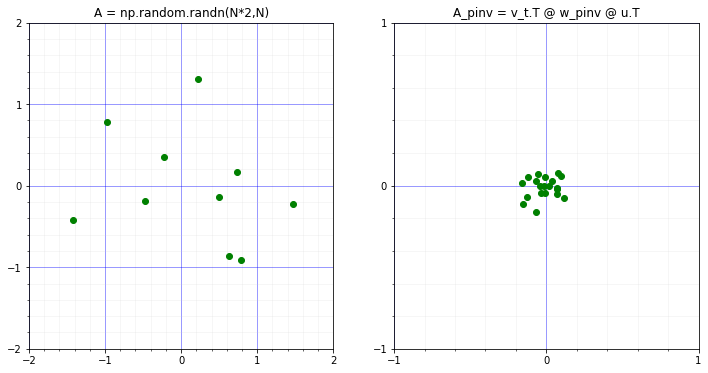

In [17]:
A_pinv = v_t.T @ w_pinv @ u.T


#######################################
print_image('A','A',A,0,5,0,4)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt_view_grid(plt, 'on',-2,2,-2,2,1,0.2,1,0.2,major_color='b')
plt.title('A = np.random.randn(N*2,N)')
plt.plot(A[:,0],A[:,1],'o', color="green")

plt.subplot(122)
plt_view_grid(plt, 'on',-1,1,-1,1,1,0.2,1,0.2,major_color='b')
plt.title('A_pinv = v_t.T @ w_pinv @ u.T')
plt.plot(A_pinv[:,0],A_pinv[:,1],'o', color="green")
plt.show()

In [18]:
x_est = A_pinv @ b


#######################################
print_image('A','A',A,0,5,0,4)
print_image('x','x',x,0,10,0,4)
print_image('x_est','x_est',x_est,0,10,0,4)

------  A------------------------    Shape(10, 20) A: float64
[ 0.4967141530112327 -0.13826430117118466 0.6476885381006925 1.5230298564080254 ]
[ 1.465648768921554 -0.22577630048653566 0.06752820468792384 -1.4247481862134568 ]
[ 0.7384665799954104 0.1713682811899705 -0.11564828238824053 -0.3011036955892888 ]
[ -0.47917423784528995 -0.18565897666381712 -1.1063349740060282 -1.1962066240806708 ]
[ -0.21967188783751193 0.3571125715117464 1.477894044741516 -0.5182702182736474 ]
------  x------------------------    Shape(20, 1) x: float64
[ 0.4967141530112327 ]
[ -0.13826430117118466 ]
[ 0.6476885381006925 ]
[ 1.5230298564080254 ]
[ -0.23415337472333597 ]
[ -0.23413695694918055 ]
[ 1.5792128155073915 ]
[ 0.7674347291529088 ]
[ -0.4694743859349521 ]
[ 0.5425600435859647 ]
------  x_est--------------------    Shape(20, 1) x_est: float64
[ 0.4967141530112324 ]
[ -0.1382643011711856 ]
[ 0.6476885381006932 ]
[ 1.5230298564080242 ]
[ -0.23415337472333408 ]
[ -0.23413695694918085 ]
[ 1.579212815507

In [19]:
print('Solved underdetermined system')
print('Residual:', cv2.norm(b - A @ x_est))
print('Relative error:', cv2.norm(x_est - x) / cv2.norm(x))

Solved underdetermined system
Residual: 9.85537918881547e-15
Relative error: 9.716988489122423e-16
